## Аналитика в авиакомпании

Необходимо изучить предпочтения пользователей, покупающих билеты на те или иные направления компании F9. На первом этапе была получена информация из базы данных средствами PostgreSQL. На основании полученных данных требуется провести аналитику данных.

### План исследования: <a id="step0"></a>

[**Шаг 1. Загрузка файлов с данными и изучение информации**](#step1)

[**Шаг 2. Анализ данных**](#step3)
    
  2.1 Топ-10 городов по количеству рейсов;
  
  2.2 Построение графиков:
- Модели самолетов и количество рейсов;
- Города и количество рейсов;
- Топ-10 городов и количество рейсов

[**Шаг 3. Выводы**](#step6)

### Шаг 1. Загрузка файлов с данными и изучение информации <a id="step1"></a>

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df_1 = pd.read_csv('/Users/maxim/Documents/Edu/DA/Yandex/Datasets/06_flight_tickets/query_1.csv')
df_1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


- model — модели самолета;
- flights_amount — количество рейсов для каждой модели самолета в сентябре 2018 года

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
df_2 = pd.read_csv('/Users/maxim/Documents/Edu/DA/Yandex/Datasets/06_flight_tickets/query_3.csv')
df_2.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


- city — город прибытия рейса;
- average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
df_2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [8]:
df_1.duplicated().sum() #проверка на дубликаты

0

In [9]:
df_2.duplicated().sum()

0

#### Вывод
Данные представлены в корректных типах - обработка не требуется, дубликаты и пропуски не выявлены.

### Шаг 2. Анализ данных <a id="step2"></a>
[*Наверх к плану*](#step0)

#### 2.1 Топ-10 городов по количеству рейсов

In [10]:
df_2.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Москва как главный транспортный авиаузел, включающий 4 гражданских аэропорта, на 1 месте с большим отрывом. Замыкают тройку лидеров Санкт-Петербург и Новосибирск. Среднее значение 130 рейсов в день на Москву всё же стоит проверить с администратором базы данных, так как это довольно подозрительный показатель, особенно с учетом того, что авиакомпания не осуществляет международные рейсы.

#### 2.2 Построение графиков 

Воспользуемся инструментами библиотеки Plotly для интерактивного отображения результатов:

##### Модели самолетов и количество рейсов

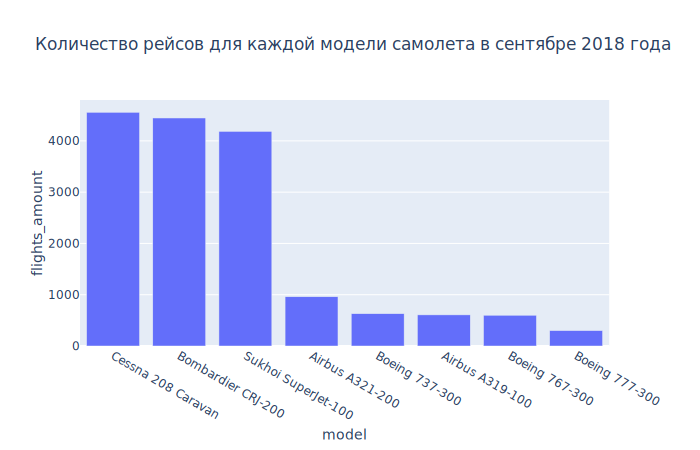

In [11]:
fig = px.bar(
    df_1.sort_values('flights_amount', ascending=False), 
    x='model', 
    y='flights_amount',
    title='Количество рейсов для каждой модели самолета в сентябре 2018 года')
fig.show("svg")

Большинство рейсов авиакомпании выполняются на 3 типах самолетов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.	

##### Города и количество рейсов

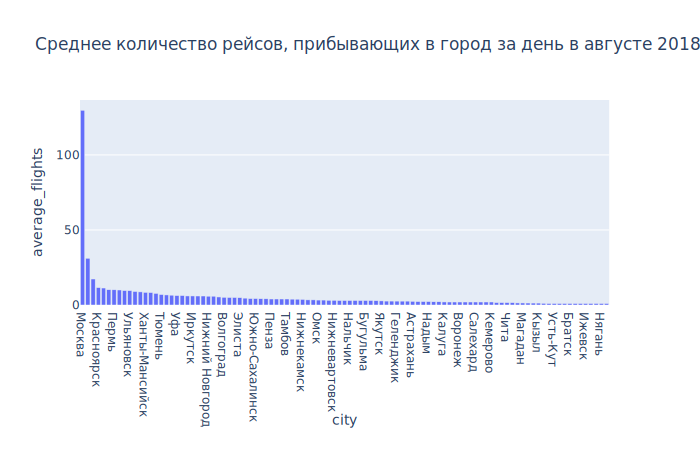

In [12]:
fig = px.bar(
    df_2.sort_values('average_flights', ascending=False), 
    x='city', 
    y='average_flights',
    title='Cреднее количество рейсов, прибывающих в город за день в августе 2018 года')
fig.show("svg")

Авиакомпания имеет обширную транспортную сеть внутрироссийских авиаперевозок, покрывающую 101 город/направление.

##### Топ-10 городов и количество рейсов

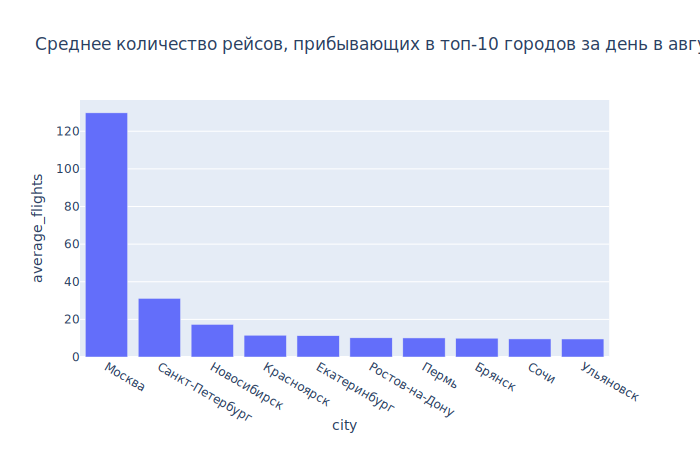

In [13]:
fig = px.bar(
    df_2.sort_values('average_flights', ascending=False).head(10), 
    x='city', 
    y='average_flights',
    title='Cреднее количество рейсов, прибывающих в топ-10 городов за день в августе 2018 года')
fig.show("svg")

### Шаг 3. Общий вывод<a id="step2"></a>
[*Наверх к плану*](#step0)

- Москва - как главный связующий транспортный хаб России принял наибольшее количество рейсов авиакомпании в августе 2018 года. На 2 месте - Санкт-Петербург, культурная столица, второй по величине город страны, принимающий большое количество туристов в августе. На 3 месте расположился Новосибирск, являющийся главным транспортным узлом азиатской части России. Остальные города из десятки лидеров в среднем принимали по 10-11 рейсов в день в исследуемом периоде;
- Большая часть парка авиакомпании составляют борты Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100, предназначенные для полетов на короткие и средние дистанции, на которых организовали более 75% всех перелетов в сентябре 2018. Также, авиакомпания использует борты Airbus и Boeing.